In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from problem import get_train_data
from problem import turn_prediction_to_event_list

In [5]:
data_train, labels_train = get_train_data()
events = turn_prediction_to_event_list(labels_train)

In [6]:
def plot_event(start, end, data, delta=36, figsize=(10, 60)):
    start = pd.to_datetime(start)
    end = pd.to_datetime(end)
    subset = data[(start - pd.Timedelta(hours=delta)):(end + pd.Timedelta(hours=delta))]
    label_subset = labels_train.loc[subset.index]

    n_data_cols = data.shape[1]

    fig, axes = plt.subplots(nrows=n_data_cols, ncols=1, figsize=figsize, sharex=True)
    
    if n_data_cols == 1:
        axes = [axes]

    for ax, col in zip(axes, data.columns):

        l = 0.1
        low = np.ma.masked_where(label_subset > l, subset[col])
        high = np.ma.masked_where(label_subset < l, subset[col])
        
        ax.plot(subset.index, low)
        ax.plot(subset.index, high, color='orange')
        ax.set_ylabel(col)


    # add vertical lines
    for ax in axes:
        ax.axvline(start, color='k')
        ax.axvline(end, color='k')
        ax.xaxis.grid(True, which="minor")

    
    return fig, axes
    
def consecutive_plots(data, events, n_events, delta=36, random_state=1, figsize=(10, 60)):
    rng = np.random.RandomState(random_state)
    random_index = rng.randint(0, len(events) - n_events)

    for i in range(random_index, random_index + n_events):
        plot_event(events[i].begin, events[i].end, data, delta=delta, figsize=figsize)

def multiple_plots(data, n_events, events, delta=36, random_state=1, figsize=(10, 60)):
    rng = np.random.RandomState(random_state)

    for i in rng.randint(0, len(events), n_events):
        plot_event(events[i].begin, events[i].end, data, delta=delta, figsize=figsize)

In [85]:
df = data_train.copy()
df['label'] = labels_train

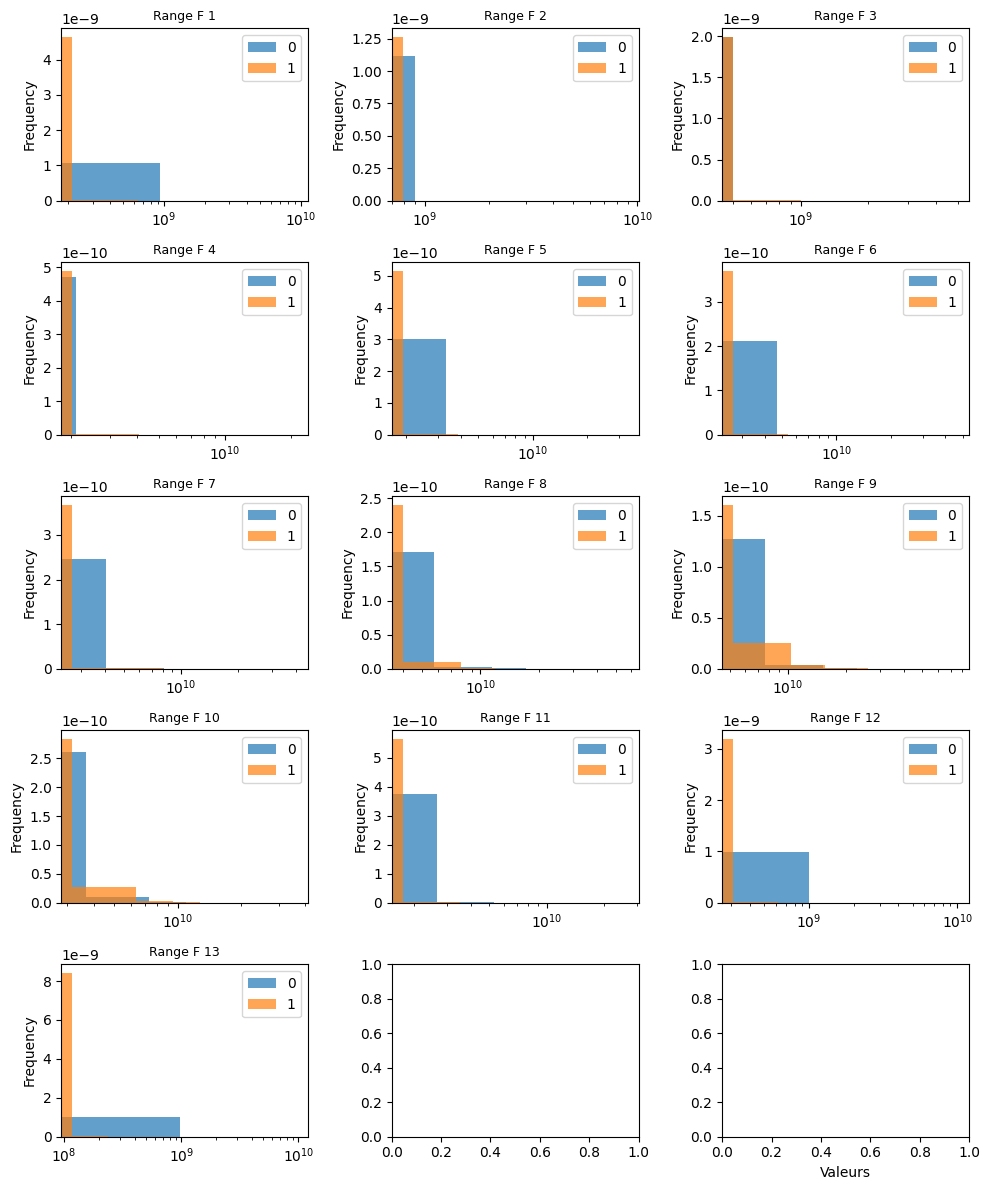

In [91]:
l = ['Range F 1', 'Range F 2', 'Range F 3', 'Range F 4', 'Range F 5', 'Range F 6', 'Range F 7', 'Range F 8', 'Range F 9', 'Range F 10', 'Range F 11', 'Range F 12', 'Range F 13']

fig, axs =  plt.subplots(5, 3, figsize=(10, 12))

for range_name, ax in zip(l, axs.flatten()):
    ax.set_title(range_name, fontsize=9)
    plt.xlabel('Valeurs')
    plt.tight_layout()
    
    # df = df.drop(df[df[range_name] > 1000].index)
    df.groupby(['label'])[range_name].plot(kind='hist', ax=ax, alpha=0.7, legend=True, density=True, logx=True)

- Si on avait autant de périodes de tempête que de période calme ces histogrammes représenteraient un très grand espoir de parvenir à une classification, hélas ce n'est pas le cas..

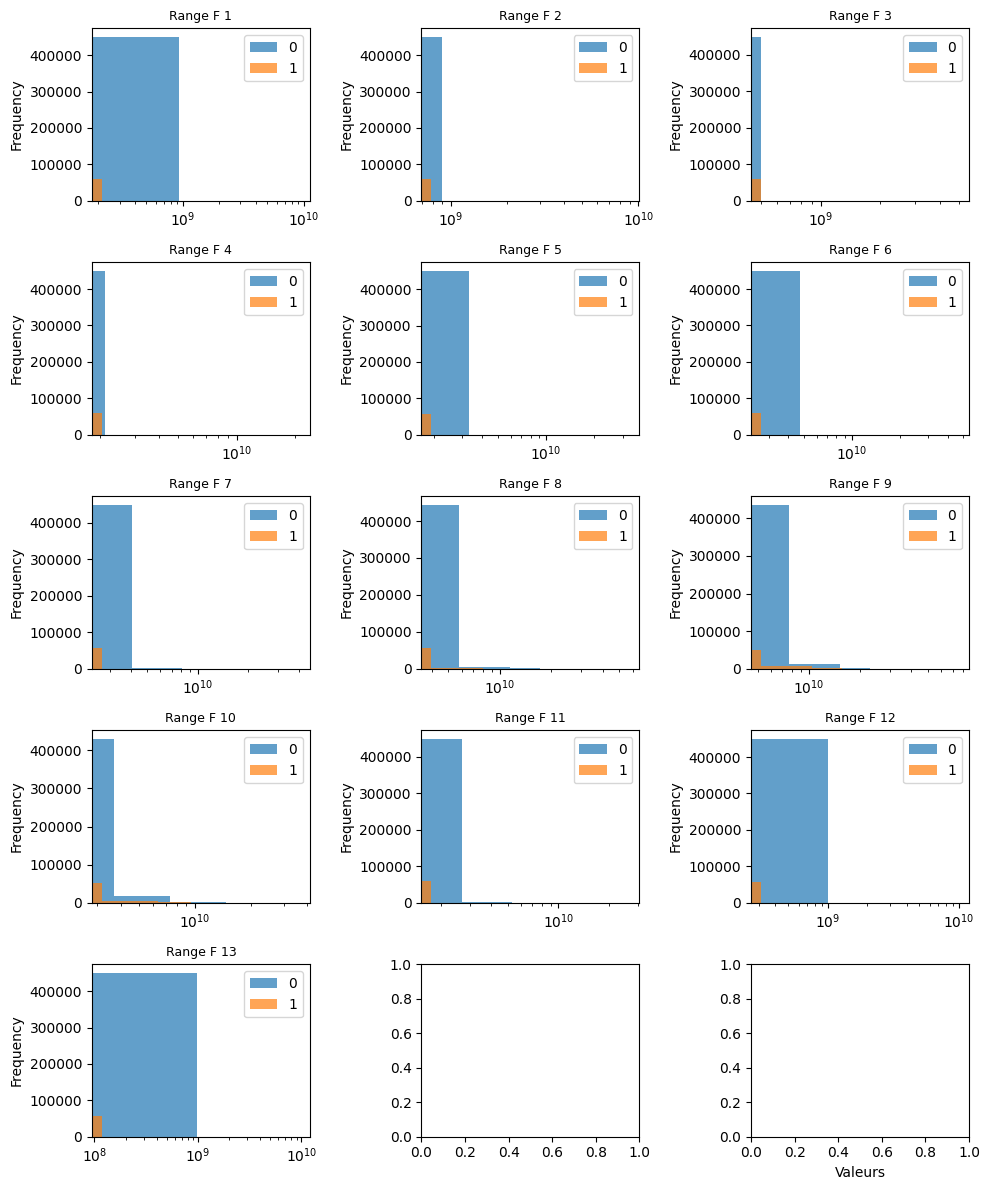

In [92]:
fig, axs =  plt.subplots(5, 3, figsize=(10, 12))

for range_name, ax in zip(l, axs.flatten()):
    ax.set_title(range_name, fontsize=9)
    plt.xlabel('Valeurs')
    plt.tight_layout()
    
    # df = df.drop(df[df[range_name] > 1000].index)
    df.groupby(['label'])[range_name].plot(kind='hist', ax=ax, alpha=0.7, legend=True, density=False, logx=True, bins=10)

In [84]:
(df['Range F 3'] > 5 * 1e9).sum()

58

In [88]:
df['Range F 3'] = df['Range F 3'].map(lambda x: min(x, 5 * 1e9))

label
0    AxesSubplot(0.125,0.11;0.775x0.77)
1    AxesSubplot(0.125,0.11;0.775x0.77)
Name: Range F 3, dtype: object

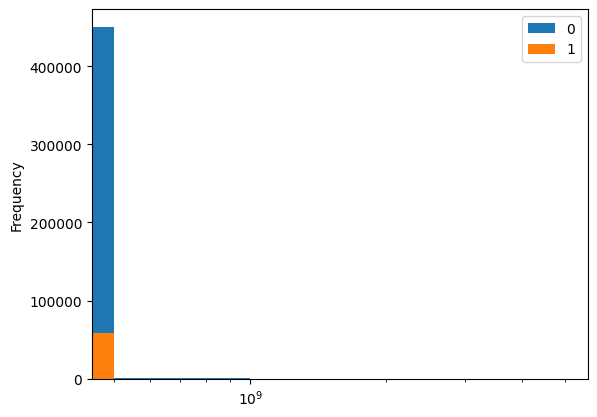

In [90]:
df.groupby('label')['Range F 3'].plot(kind='hist', logx=True, legend=True)

In [65]:
storm_df = df[['Range F 3', 'label']][df['label'] == 1]
calm_df = df[['Range F 3', 'label']][df['label'] == 0]

In [66]:
storm_df['Range F 3'].describe()

count    5.856500e+04
mean     2.977616e+07
std      1.701808e+08
min      0.000000e+00
25%      5.375006e+06
50%      1.253584e+07
75%      2.740853e+07
max      2.109568e+10
Name: Range F 3, dtype: float64

In [67]:
calm_df['Range F 3'].describe()

count    4.512690e+05
mean     3.651697e+07
std      9.970342e+07
min      0.000000e+00
25%      9.098222e+06
50%      2.204554e+07
75%      4.471924e+07
max      1.087524e+10
Name: Range F 3, dtype: float64

In [72]:
labels_train[data_train['Range F 3'] > (1 * 1e10)].value_counts()

1    3
0    2
Name: label, dtype: int64

### Corrélation between F

In [41]:
f_range_df = data_train[l].copy()

In [44]:
corr = f_range_df.corr('spearman')
# corr

In [46]:
two_f_df = f_range_df[['Range F 1', 'Range F 11']]

array([<AxesSubplot: >, <AxesSubplot: >], dtype=object)

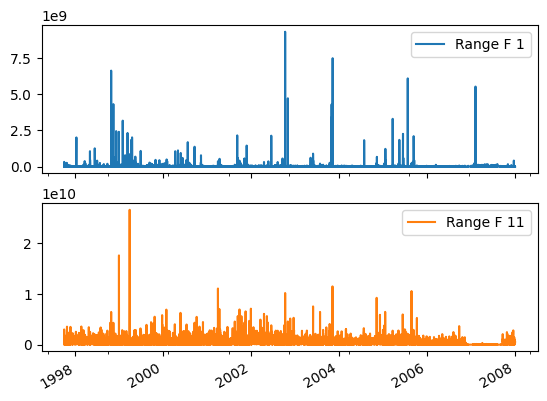

In [48]:
two_f_df.plot(subplots=True)

In [ ]:
two_f_df['Range F 1'] = two_f_df['Range F 1'].map(lambda x: min(x, 2.6 * 1e9))
two_f_df['Range F 11'] = two_f_df['Range F 11'].map(lambda x: min(x, 1e10))

array([<AxesSubplot: >, <AxesSubplot: >], dtype=object)

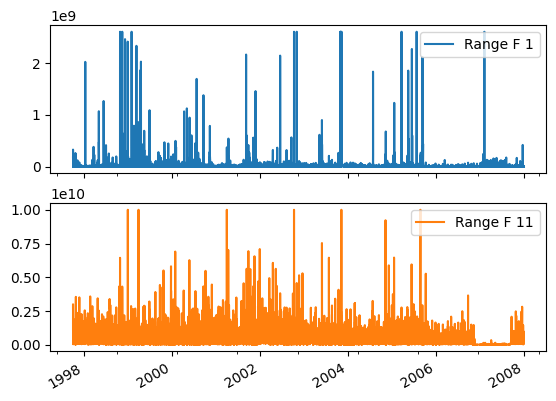

In [52]:
two_f_df.plot(subplots=True)

<AxesSubplot: xlabel='Range F 1', ylabel='Range F 11'>

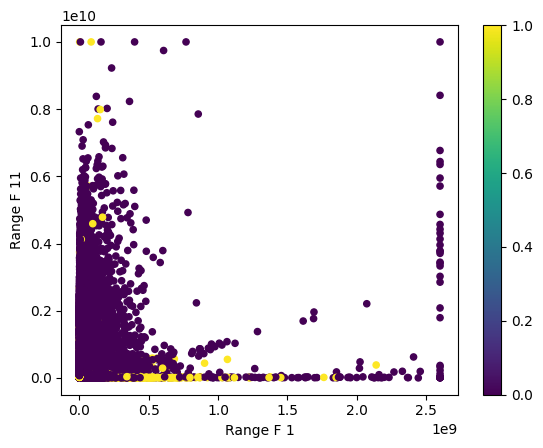

In [54]:
two_f_df.plot(kind='scatter', x='Range F 1', y='Range F 11', legend=True, c=labels_train.values, colormap='viridis')